## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [34]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, recall_score, precision_score, auc, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from plotnine import *
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from plotnine import *
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [5]:
ha = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
ha = ha.dropna(axis =0)
ha.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [3]:
ha['sex']=ha['sex'].astype(str)
ha['cp']=ha['cp'].astype(str)
ha['restecg']=ha['restecg'].astype(str)

In [25]:
X = ha[['age', 'chol']]
y = ha['diagnosis']

In [52]:
ct = ColumnTransformer(
  [("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object))
  ],
  remainder = "passthrough"
)


lr_pipeline = Pipeline(
   [("preprocessing", ct),
    ("LogisticRegression", LogisticRegression())]
    )

In [64]:
lr_pipeline_fitted = lr_pipeline.fit(X, y)
feature_names1 = lr_pipeline_fitted.named_steps['preprocessing'].get_feature_names_out().ravel()
coefficients1 = lr_pipeline_fitted.named_steps['LogisticRegression'].coef_.ravel()

df = pd.DataFrame({
    "Predictor":feature_names1,
    "Coefficient":coefficients1
})

df

,Predictor,Coefficient
0,remainder__age,0.046863
1,remainder__chol,0.001801


In [65]:
inter_lr= lr_pipeline_fitted.named_steps['LogisticRegression'].intercept_
inter_lr

array([-3.24011226])

0 = 0.047 * 55 + 0.002*chol - 3.24

.655 = 0.002*chol

chol = 327.5

The cholesteral would need to be 327.5 for a 55 year old for a doctor to predict heart disease is present.


In [47]:
z = np.log(0.9/.1)
z

2.1972245773362196

90% chance of heart disease: (disease is 1)

zi = log (.9/(1-.9))

2.1972 = 0.047 * 55 + 0.002*chol - 3.24

2.1972 = -.655 + .002*chol

2.8522 = .002*chol

chol = 1426.1

Cholesterol would need to be 1426.1 for the doctors to estimate a 90% chance that heart disease is present for a 55 year old


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [31]:
lda_pipeline = Pipeline(
   [("preprocessing", ct),
    ("LDA", LinearDiscriminantAnalysis())]
    )

In [67]:
lda_pipeline_fitted = lda_pipeline.fit(X, y)
feature_names1 = lda_pipeline_fitted.named_steps['preprocessing'].get_feature_names_out().ravel()
coefficients1 = lda_pipeline_fitted.named_steps['LDA'].coef_.ravel()

df_lda = pd.DataFrame({
    "Predictor":feature_names1,
    "Coefficient":coefficients1
})
df_lda

,Predictor,Coefficient
0,remainder__age,0.046557
1,remainder__chol,0.001790


In [68]:
inter_lda= lda_pipeline_fitted.named_steps['LDA'].intercept_
inter_lda

array([-3.21967766])

0 = 0.046557 * 55 + .001790*chol -3.21967766

0 = 2.56 + .001790x - 3.21967766

0 = .001790x - 0.66

.66 = .001790x

Chol 368.715

Cholosteral would need to be 368.72 for a 55 year old for doctor to predict heart disease.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [57]:
svc_pipeline = Pipeline(
   [("preprocessing", ct),
    ("SVC", SVC())]
    )

In [58]:
tune = {'SVC__C': [0.001,.01,.1,.25,.5,.75,.9]}
gscv1 = GridSearchCV(svc_pipeline, tune, cv = 5, scoring='roc_auc')
gscv_fitted1 = gscv1.fit(X, y)

results_df = pd.DataFrame(gscv_fitted1.cv_results_)
results_df = results_df[["param_SVC__C","mean_test_score"]]

In [59]:
results_df.sort_values(by=["mean_test_score"], ascending = False)

,param_SVC__C,mean_test_score
1,0.01,0.621114
6,0.9,0.607360
4,0.5,0.606877
5,0.75,0.606877
2,0.1,0.606365
0,0.001,0.606053
3,0.25,0.605854


In [60]:
svc_pipeline_tuned = Pipeline(
   [("preprocessing", ct),
    ("SVC", SVC(C=0.01, kernel="linear"))]
    )

In [61]:
svc_pipeline_fitted = svc_pipeline_tuned.fit(X, y)
feature_names1 = svc_pipeline_fitted.named_steps['preprocessing'].get_feature_names_out().ravel()
coefficients1 = svc_pipeline_fitted.named_steps['SVC'].coef_.ravel()

df_svc = pd.DataFrame({
    "Predictor":feature_names1,
    "Coefficient":coefficients1
})

df_svc

,Predictor,Coefficient
0,remainder__age,0.064427
1,remainder__chol,0.003650


In [62]:
inter_svc= svc_pipeline_fitted.named_steps['SVC'].intercept_
inter_svc

array([-4.68505917])

0 = 0.0644*55 + .00365*chol - 4.685

0 = 3.542 + .00365*chol - 4.685

1.143 =.00365*chol

Chol: 313.15

Cholesterol would need to be 313.15 for a 55 year old for a doctor to predict heart disease is present.


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [85]:
#logistic
age_lr = df['Coefficient'].iloc[0]
chol_lr = df['Coefficient'].iloc[1]
inter_lr

-3.2401122588583937

In [95]:
#SVC
age_svc = df_svc['Coefficient'].iloc[0]
chol_svc = df_svc['Coefficient'].iloc[1]
#inter_svc = inter_svc[0]
inter_svc
age_svc
chol_svc

0.003650465689269744

In [86]:
#LDA
age_lda = df_lda['Coefficient'].iloc[0]
chol_lda = df_lda['Coefficient'].iloc[1]
#inter_lda = inter_lda[0]
inter_lda

-3.2196776604068784

0 = age_coef * age + chol_coef * chol + intercept

y = mx + b

slope: -age_coef / chol_coef

intercept: -intercept / chol_coef

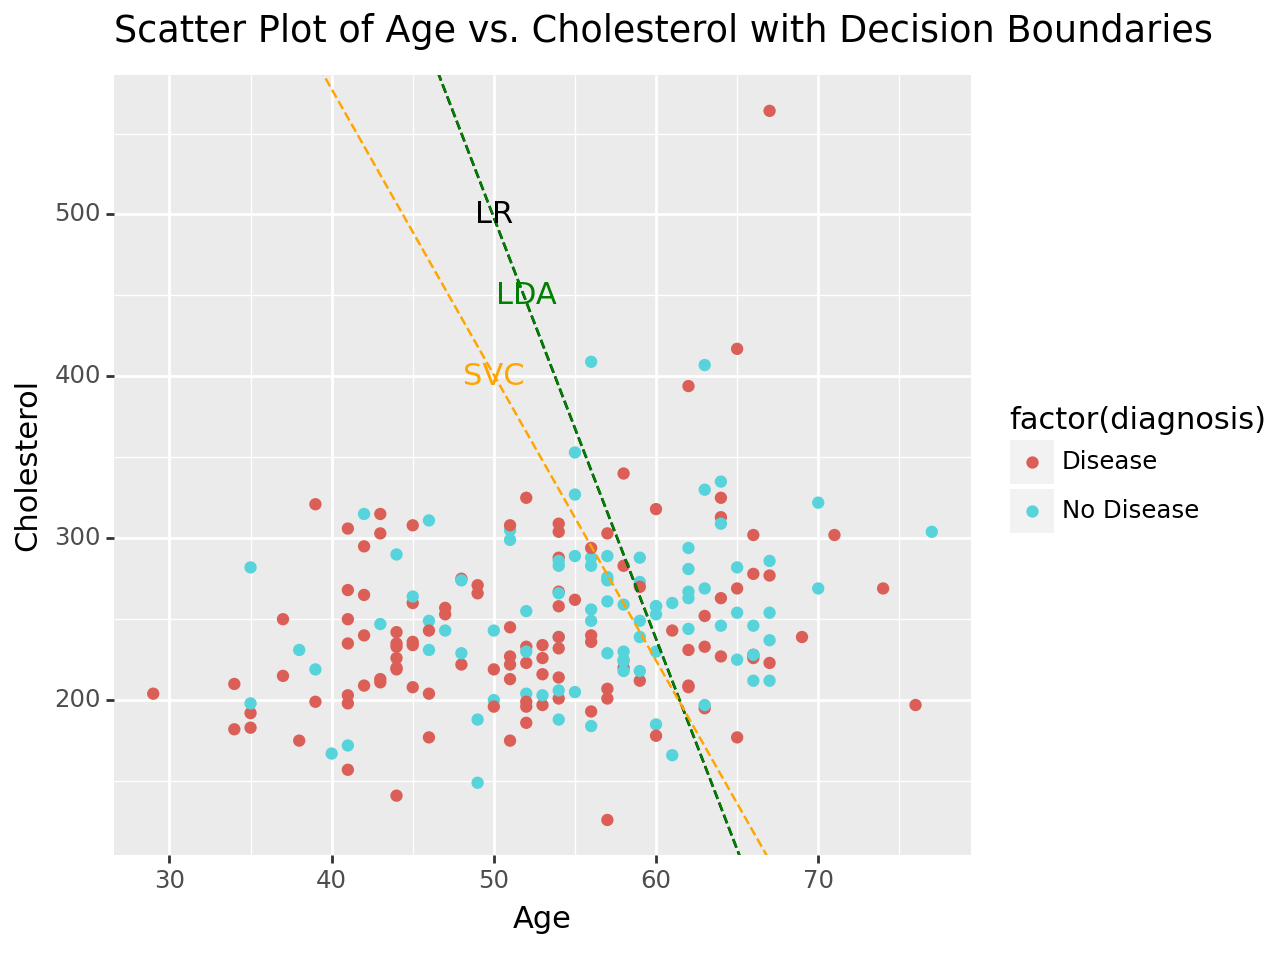

In [101]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_abline, labs

scatter_plot = ggplot(ha, aes(x='age', y='chol', color='factor(diagnosis)')) + geom_point() + labs(title='Scatter Plot of Age vs. Cholesterol with Decision Boundaries', x='Age', y='Cholesterol')
# Decision boundary lines
lr_line = geom_abline(intercept=-inter_lr/chol_lr, slope=-age_lr/chol_lr, linetype='dashed', color='black')
lda_line = geom_abline(intercept=-inter_lda/chol_lda, slope=-age_lda/chol_lda, linetype='dashed', color='green')
svc_line = geom_abline(intercept=-inter_svc/chol_svc, slope=-age_svc/chol_svc, linetype='dashed', color='orange')

lr_label = annotate("text", x=50, y=500, label="LR", color='black')
lda_label = annotate("text", x=52, y=450, label="LDA", color='green')
svc_label = annotate("text", x=50, y=400, label="SVC", color='orange')

# Combine scatter plot, decision boundary lines, and labels
final_plot = scatter_plot + lr_line + lda_line + svc_line + lr_label + lda_label + svc_label

# Display the plot
print(final_plot)
